#  Classification with KNN

Repeating the data preprocessing steps from the previous question : 

#### Importing necessary libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import scale

#### Loading dataset using pandas and store it as dataframe

In [5]:
colnames=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight',  'Rings'] 
data = pd.read_csv('C:/Users/shrey/Downloads/abalone.csv', names=colnames, header=None)

##  Starting by training the model with the classifier’s default parameters using the training set and test the model with the test set.

Since KNN is a distance based algorithm which requires numeric value as input. Therefore, if the dataset contains categorical feature, they need to be transformed into the numerical values before they can be used as input into the KNN. As we know that the Sex feature in our dataset is a categorical feature and needs to be converted into a numeric value, we implemented One-hot encoding which is a common technique for transforming categorical data into numerical data.It makes it easier to understand the relationships between categories and the target variable.

In [6]:
#one hot encoding
df=data.copy()
one_hot=pd.get_dummies(df['Sex'])
df=df.drop('Sex',axis=1)
df=df.join(one_hot)
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


We start training the model by splitting the training set and test set. 
x contains all the features and y contains the target varaible('Rings').
By default, the train_test_split function splits the data into 75% training data and 25% test data.

In [7]:
# split training and test data
x= df.loc[:,df.columns!='Rings']
y= df.loc[:,'Rings']    
x_train, x_test, y_train, y_test= train_test_split(x, y, random_state=123)

**Note: Used 'random_state' parameter to set a seed for the random number generator. This helps us splitting our dataset into training and testing set as it ensures that the same split is performed each time you run the code.**

Since KNN is a distance based algorithm which requires numeric value as input. Therefore, if the dataset contains categorical feature, they need to be transformed into the numerical values before they can be used as input into the KNN. As we know that the Sex feature in our dataset is a categorical feature and needs to be converted into a numeric value, we implemented One-hot encoding which is a common technique for transforming categorical data into numerical data.It makes it easier to understand the relationships between categories and the target variable.

KNeighborsClassifier is a class from scikit learn library. It implements the KNN algorithm for classification and provides a convenient interface for fitting the model to the training data and making predictions on new data. 

The default value of k in the library is 5. 

In [8]:
neigh=KNeighborsClassifier()
neigh.fit(x_train, y_train)

KNeighborsClassifier()


After training the model on a training dataset, we make use of predict() method to make predictions on new data points that have not been seen during the training period. 
We are storing the results of the new test dataset 'x_test' into the 'test_pred' variable in the following code. 

In [9]:
test_pred= neigh.predict(x_test)
# y_test to convert as numpy array
test_y=y_test.values

#### Evaluating the model performance using the confusion matrix
In order to evaluate the performance of our KNN model, we chose confusion matrix. It contains 4 main components - true positive, true negative, false positive and false negative. 
The diagonal of a confusion matrix for a KNN model represents the number of correctly classified instances, ie; it will contain the number of true positives and true negatives.

In [10]:
# accuracy using confusion matrix
dup=confusion_matrix(test_y,test_pred)
diag_sum= dup.diagonal().sum()
total = dup.sum()
accuracy=(diag_sum/total)*100
display(accuracy)

24.401913875598087

To calculate the model accuracy, we took the ratio of correctly classified instances to the total number of instances in the test dataset.
Therefore, **the accuracy of the model is determined to be 24.40%** 

#### Evaluating the model performance using inbuilt score() of sklearn library

After training the KNN model and using it to make prediction on a test set, we can use core method to calculate the accuracy of the prediction. It calculates the proportion of correctly classified instances. 

In [11]:
# inbuilt fucntion accuracy
print(neigh.score(x_test, y_test)*100)

24.401913875598087


The accuracy of the model is found to be exactly same in both the methods.

## Different values of k will lead to different results. 

In [12]:
neigh=KNeighborsClassifier(n_neighbors=7)
neigh.fit(x_train, y_train)
print(neigh.score(x_test, y_test)*100)

24.593301435406698


In [13]:
neigh=KNeighborsClassifier(n_neighbors=9)
neigh.fit(x_train, y_train)
print(neigh.score(x_test, y_test)*100)

26.698564593301437


In [14]:
neigh=KNeighborsClassifier(n_neighbors=11)
neigh.fit(x_train, y_train)
print(neigh.score(x_test, y_test)*100)

26.31578947368421


The above code shows that different values of k leads to different accuracy. Also, the accuracy of the model for the given dataset was found to be below 50%. 

##  Tuning the classifier- find the best value for k

##  First divide the data into Training and Testing sets in the ratio 80%/20%

In [15]:
# Splitting the data into training set(80%) and test sets (20%)
x_train, x_test, y_train, y_test= train_test_split(x, y,test_size=0.2, random_state=12345)

##  Testing a range of values for the KNN parameter k using 5-fold cross validation on the Training set.

In k-fold cross-validation, the original dataset is divided into k equally sized subsets, or folds. The model is then trained on k-1 of the folds and tested on the remaining one. This process is repeated k times, with a different fold being used as the test set in each iteration. The performance of the model is then averaged across the k iterations to provide an overall evaluation of the model's performance.

The main advantage of k-fold cross-validation is that it provides a more robust estimate of the model's performance compared to using a single train/test split. By using multiple subsets of the data, it provides a better indication of how the model will perform on unseen data.A high value of k will result in a slower evaluation process, but will provide a more accurate estimate of the model's performance.

### Sample code for 5-fold cross validation with 3 nearest neighbors
The following code returns the 5 cv scores and the mean of the cv scores.

In [16]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, x_train, y_train, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.20627803 0.21856287 0.20808383 0.21407186 0.21257485]
cv_scores mean:0.21191428801589646


#### To tune the classifier, run the k-fold cross validation where k=5, with different value of K ranging from 1 to 100.

In [20]:
accuracy_scores=[]
for k in range(1,101):
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    cv_scores=cross_val_score(knn_cv, x_train,y_train,cv=5)
    accuracy_scores.append(np.mean(cv_scores)*100)
formatted_list= ['%.2f' % elem for elem in accuracy_scores]
print('Acuracy_scores:-',formatted_list)
#     print('Hyperparameter k =',k,'cv_scores mean:{}'.format(np.mean(cv_scores)))
    

Acuracy_scores:- ['21.10', '22.39', '21.19', '22.15', '23.08', '23.32', '24.27', '24.39', '24.60', '25.38', '25.38', '25.29', '25.95', '25.44', '26.13', '25.92', '25.71', '26.01', '26.46', '26.40', '26.25', '26.55', '26.13', '26.43', '26.07', '26.34', '25.98', '26.61', '26.25', '26.55', '26.52', '26.88', '27.27', '27.30', '26.52', '26.67', '26.49', '26.70', '26.58', '26.19', '26.31', '26.28', '26.34', '26.43', '26.40', '26.28', '26.19', '26.13', '26.25', '26.40', '26.19', '26.37', '26.16', '26.22', '26.43', '26.13', '26.34', '26.22', '25.71', '25.80', '25.77', '25.95', '25.59', '25.86', '25.74', '25.71', '25.92', '26.19', '26.04', '25.92', '26.04', '26.01', '26.07', '26.01', '25.92', '26.22', '25.98', '26.10', '25.89', '26.07', '26.28', '26.22', '26.16', '26.01', '26.16', '26.40', '26.16', '26.01', '26.01', '26.04', '25.71', '26.07', '25.98', '25.89', '26.01', '26.07', '25.98', '25.92', '25.53', '25.74']


Choosing an appropriate value of k is an important step in tuning the KNN algorithm.It can be observed that, when k is low,the algorithm is more sensitive to individual observations, leading to overfitting and high variance. When k is high, the algorithm is less sensitive to individual observations, leading to underfitting and high bias.
Therefore, choosing a value of k that lies in the middle can help strike a balance between these two trade-offs and avoid overfitting or underfitting. 

**Therefore, the optimum value of k is 34.**


## producing one plot of the mean validation accuracy vs. k across all folds.

The maximum Accuracy 27.29827340834027 % is observed at k = 34


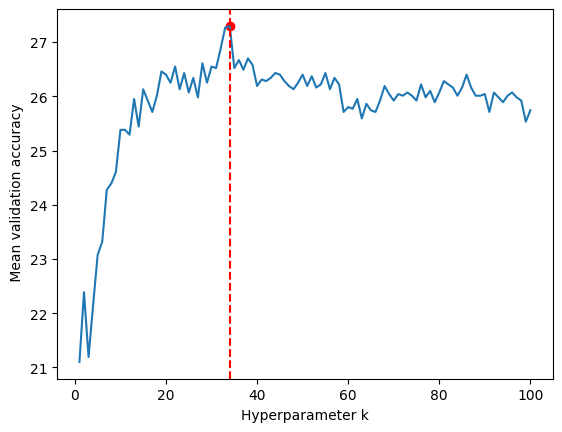

In [21]:
#potting accuracy for different values of K
k=np.arange(1,101)
plt.plot(k,accuracy_scores)
plt.xlabel('Hyperparameter k')
plt.ylabel(' Mean validation accuracy')
# plt.xlim(0,len(k)+1)
# plt.ylim(0,max(accuracy_scores)+0.1)

# Get the index of the maximum value
max_index = accuracy_scores.index(max(accuracy_scores)) + 1
# Plot markers for the maximum values
plt.scatter(max_index, max(accuracy_scores), c='red',marker='o')
plt.axvline(max_index,color='red',linestyle='--')
print('The maximum Accuracy', max(accuracy_scores),'%','is observed at k =', max_index)
plt.show()

## Once a promising value of k is chosen, you can retrain KNN using that k on all the training data and calculate accuracy on the held out Test set and report this result.

In [22]:
#training for k=34 
neigh=KNeighborsClassifier(n_neighbors=34)
neigh.fit(x_train, y_train)

test_pred= neigh.predict(x_test)
test_y=y_test.values
accuracy= neigh.score(x_test, y_test)
# print(neigh.score(x_test, y_test))
print('After retraining the KNN model with k=34, we get the accuracy of the model as:',accuracy*100,'%')

After retraining the KNN model with k=34, we get the accuracy of the model as: 26.435406698564595 %


## Improving on KNN: using the method of weighted KNN

### using your chosen value of k above compute the values on your Test set using the other weighting methods. 

"weight" refers to the importance assigned to each of the k nearest neighbors of a query point when making a prediction for that point. 

weights='distance' refers to weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

In [23]:
knn=KNeighborsClassifier(n_neighbors=34, weights='distance')
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.27751196172248804

weights= 'uniform' refers to uniform weights.All points in each neighborhood are weighted equally.

In [24]:
knn=KNeighborsClassifier(n_neighbors=34, weights='uniform')
knn.fit(x_train, y_train)
accuracy= knn.score(x_test, y_test)
print('Accuracy (default weighting method):', accuracy*100,'%')

Accuracy (default weighting method): 26.435406698564595 %


### Metric to use for distance computation 

The distance metric determines how the algorithm measures the similarity between instances in training and test data. It is used to determine which instances in training data are nearest to an instance in the test data. Different distance metrics can be used in KNN which are as follows:-

1. Manhattan : Manhattan Distance is given by | x 1 − x 2 | + | y 1 − y 2 | 

In [25]:
knn=KNeighborsClassifier(n_neighbors=34,weights= 'distance', metric= 'manhattan')
knn.fit(x_train, y_train)
accuracy=knn.score(x_test, y_test)
print('Accuracy (Manhattan weighting method):', accuracy*100,'%')

Accuracy (Manhattan weighting method): 25.358851674641148 %


2. Euclidean : Euclidean = d = √[ (x2– x1)^2 + (y2–y1)^2]

In [26]:
knn=KNeighborsClassifier(n_neighbors=34, weights= 'distance',metric= 'euclidean')
knn.fit(x_train, y_train)
accuracy=knn.score(x_test, y_test)
print('Accuracy (Euclidean weighting method):', accuracy*100,'%')

Accuracy (Euclidean weighting method): 27.751196172248804 %


3. Minkowski : Minkowski= d = ( |X1 – Y1|^p + |X2 – Y2|^p  + |X3– Y3|^p )1/p

In [27]:
knn=KNeighborsClassifier(n_neighbors=34, weights= 'distance',metric= 'minkowski')
knn.fit(x_train, y_train)
accuracy=knn.score(x_test, y_test)
print('Accuracy (Minkowski weighting method):', accuracy*100,'%')

Accuracy (Minkowski weighting method): 27.751196172248804 %




4. Cosine: cosine = (A.B) / (||A||.||B||

In [28]:
knn=KNeighborsClassifier(n_neighbors=34, weights= 'distance',metric= 'cosine')
knn.fit(x_train, y_train)
accuracy=knn.score(x_test, y_test)
print('Accuracy (Cosine weighting method):', accuracy*100,'%')

Accuracy (Cosine weighting method): 25.95693779904306 %


The choice of distance metric can affect the performance of the KNN algorithm which can be seen, so it is important to choose an appropriate distance metric based on the characteristic of the data and the problem we are trying to solve. 

### Comparing the three different weighting schemes (default, Manhatten, Euclidean) by plotting accuracy vs k for all three of them on the same figure to see the effect.

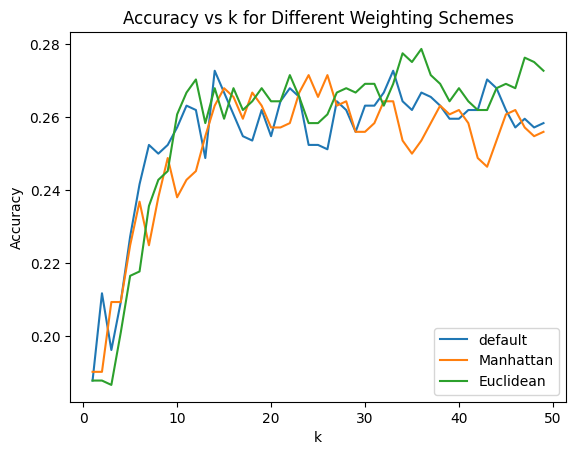

In [29]:
k_range = np.arange(1, 50)

# Initialize arrays to store the accuracy scores for each weighting scheme
uniform_scores = []
manhattan_scores = []
euclidean_scores = []
cosine_scores=[]

# Loop over k-values
for k in k_range:
    # Fit the KNN classifier with default weighting scheme
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    uniform_scores.append(accuracy_score(y_test, y_pred))
    
    # Fit the KNN classifier with Manhattan weighting scheme
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='manhattan')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    manhattan_scores.append(accuracy_score(y_test, y_pred))
    
    # Fit the KNN classifier with Euclidean weighting scheme
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    euclidean_scores.append(accuracy_score(y_test, y_pred))
    
# Plot the accuracy scores for each weighting scheme
plt.plot(k_range, uniform_scores, label='default')
plt.plot(k_range, manhattan_scores, label='Manhattan')
plt.plot(k_range, euclidean_scores, label='Euclidean')


# Add labels and title to the plot
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k for Different Weighting Schemes')
plt.legend()

plt.show()

The graph produced shows the relationship between the number of neighbors (k) and the accuracy of the KNN classifier for different weighting schemes.The three lines in the graph correspond to the accuracy scores for the default, manhattan, and euclidean weighting schemes, respectively.

It can be observed that, the highest accuracy for a given k is achieved with Euclidean weighing scheme than the Manhattan and default weighing scheme.

## Bibliography:
1. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
2. https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
3. https://machinelearningmastery.com/k-nearest-neighbors-for-machine-learning
4. https://www.youtube.com/@dataandknowledgemodelingan75